In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\Telecom_Customer_Churn_Dataset.csv")

In [3]:
df.head()

,CustomerID,Tenure_Months,Monthly_Charges,Total_Charges,Contract_Type,Internet_Service,Payment_Method,Churn
0,CUST00001,52,1541.42,75408.44,Two Year,No,UPI,No
1,CUST00002,15,1317.97,73419.49,Month-to-Month,DSL,Bank Transfer,No
2,CUST00003,61,409.64,87681.15,Month-to-Month,No,Credit Card,No
3,CUST00004,21,1791.31,72417.07,Two Year,DSL,Bank Transfer,No
4,CUST00005,24,1791.34,23568.21,One Year,Fiber Optic,Debit Card,No


# removing null and duplicate values

In [4]:
df=df.drop_duplicates()

In [5]:
df=df.dropna()

# feature scaling

In [6]:
import numpy as np

a = df.select_dtypes(include=np.number)


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
a = StandardScaler().fit_transform(a)

In [9]:
b =pd.DataFrame(a,columns=["Tenure_Months","Monthly_Charges","Total_Charges"])


In [10]:
# encoding

In [11]:
c = df.select_dtypes(include=['object'])

In [12]:
d = c.drop('CustomerID',axis = 1)

In [13]:
from sklearn.preprocessing import LabelEncoder


In [14]:
for i in d:
    d[i]= LabelEncoder().fit_transform(d[i])

In [15]:
d.head()

,Contract_Type,Internet_Service,Payment_Method,Churn
0,2,2,3,0
1,0,0,0,0
2,0,2,1,0
3,2,0,0,0
4,1,1,2,0


# combing the numerical and categorical column

In [16]:
df1 = pd.concat([b,d],axis = 1)

In [17]:
df1.head()

,Tenure_Months,Monthly_Charges,Total_Charges,Contract_Type,Internet_Service,Payment_Method,Churn
0,0.824853,0.795057,0.891582,2,2,3,0
1,-0.982193,0.339162,0.822047,0,0,0,0
2,1.264404,-1.514061,1.320641,0,2,1,0
3,-0.689158,1.304896,0.787002,2,0,0,0
4,-0.542641,1.304957,-0.920776,1,1,2,0


# Defining target and features

In [18]:
y = df1["Churn"]
x = df1.drop("Churn",axis=1)

# Train test split

In [19]:
 from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# mnodel deploy,ment

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model=LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# predictive values

In [23]:
y_pred=model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score,classification_report

In [25]:
accuracy_score(y_test,y_pred)

0.758

# final insight

In [26]:
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       379
           1       0.00      0.00      0.00       121

    accuracy                           0.76       500
   macro avg       0.38      0.50      0.43       500
weighted avg       0.57      0.76      0.65       500



In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[379,   0],
       [121,   0]])

In [28]:
accuracy = 371/500

In [29]:
model.coef_[0]

array([-0.00481257, -0.052467  , -0.13258999, -0.0772502 ,  0.08064144,
       -0.14688905])

In [30]:
x.columns

Index(['Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'Contract_Type',
       'Internet_Service', 'Payment_Method'],
      dtype='object')

In [31]:
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

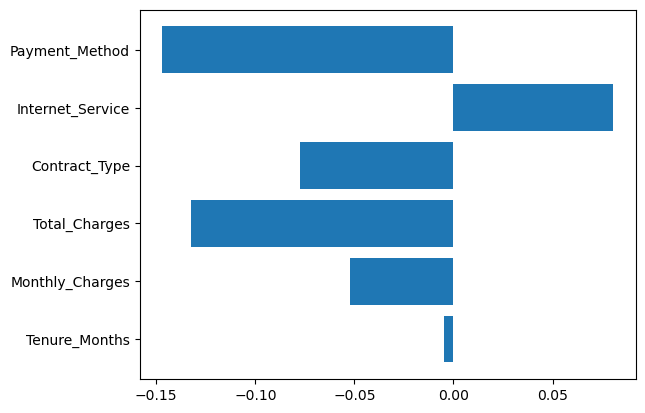

In [32]:
plt.barh(x.columns,model.coef_[0])

## The main reson behind customer churning was the intyernet servoce